# Aplicación S&P500 y Naftrac


### Varianza
$$
\sigma_p^2 = \sum_{i=1}^{n} \sum_{k=1}^{n} w_i w_k \sigma_{ik} 
$$

Caso dos activos $(a,b)$:

$$\sigma^2_p = w_a^2 \sigma^2_a + w_b^2 \sigma_{b}^2 + 2 w_a w_b cov(a,b)$$


$$cov(a,b) = \sigma_a \sigma_b corr(a,b) $$

$$\sigma^2_p = w_a^2 \sigma^2_a + w_b^2 \sigma_{b}^2 + 2 w_a w_b \sigma_a \sigma_b corr(a,b)$$




### Valor esperado
$$E[r_p]=E\left[\sum_{i=1}^{n}w_ir_i\right]=\sum_{i=1}^{n}w_iE\left[r_i\right]  $$


Caso dos activos $(a,b)$:
$$E[r_b] = w_1 \mu_{r_1} + w_2 \mu_{r_2} $$



In [1]:
# Bajamos los ETF de yahoo
import yfinance as yf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

tickers = ['VOO', 'NAFTRAC.MX']
start_date = '2015-01-01'


St = yf.download(tickers, start=start_date)['Close']
St.head()
rt = St.pct_change().dropna()


[*********************100%***********************]  2 of 2 completed


### Recordando

Si tenemos rendimientos diarios y los queremos convertir anual:
$$E[r_{anual}] = E[r_i] * 252 $$

Para el caso de la volatilidad, tenemos que multiplicar por raíz de 252
$$\sigma[r_{anual}] = \sigma_{ri} * \sqrt{252} $$



In [2]:
# Calculamos los valores esperados y volatilidades individuales
df_one_portafolio = pd.DataFrame()
df_one_portafolio['expected_value'] = rt.mean() * 252
df_one_portafolio['volatility'] = rt.std() * 252**0.5

In [3]:
df_one_portafolio

,expected_value,volatility
NAFTRAC.MX,0.034661,0.155157
VOO,0.106282,0.184318


Text(0, 0.5, 'Expected value')

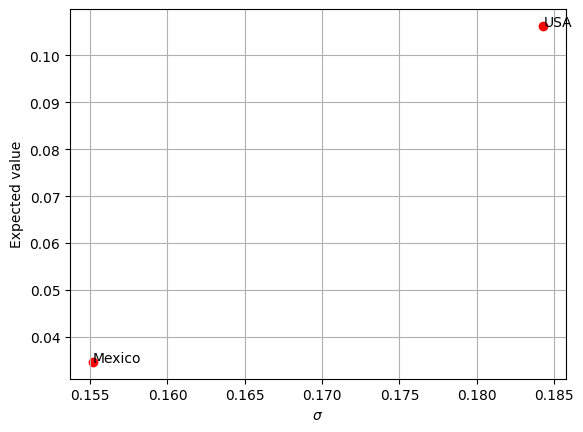

In [4]:
# Inversión en el 100% de los activos
plt.scatter(df_one_portafolio.volatility, df_one_portafolio.expected_value, c="r")
plt.text(df_one_portafolio.volatility[0], df_one_portafolio.expected_value[0], 'Mexico')
plt.text(df_one_portafolio.volatility[1], df_one_portafolio.expected_value[1], 'USA')
plt.grid()
plt.xlabel("$\sigma$")
plt.ylabel("Expected value")

# Ejemplo funciones lambda

In [5]:
# Funciones lambda 
def df_plus_1(x):
    return x['renglon'] + 1

df = pd.DataFrame()
df['renglon'] = [1, 2, 3, 4, 5]
df.apply(lambda x: df_plus_1(x), axis=1) 

0    2
1    3
2    4
3    5
4    6
dtype: int64

# ¿Cómo se verá un portafolio con diversos pesos en México y estados unidos?

In [28]:
# Correlación entre estados unidos y mexico
rt.corr()

,NAFTRAC.MX,VOO
NAFTRAC.MX,1.000000,0.513455
VOO,0.513455,1.000000


In [17]:
# Obtenemos las desviaciones estandar
s_mx = rt['NAFTRAC.MX'].std()
s_usa = rt['VOO'].std()

# Obtenemos los valores esperados
e_mx = rt['NAFTRAC.MX'].mean()
e_usa = rt['VOO'].mean()

# Obtenemos la covarianza de los dos ETF
corr_usa_mx = rt.corr().values[0][1]

In [29]:
# Dado unos pesos w1 y w2, calcular la varianza de un protafolio
df = pd.DataFrame()
df['w_usa'] =[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
df['w_mx'] = 1 - df['w_usa']

In [30]:
# Valor esperado
def expected_value(df, e1, e2):
    w1 = df['w_usa']
    w2 = df['w_mx']
    return w1*e1 + w2*e2

# Volatilidad usando la correlación
def volatility_correlation(df, s_usa, s_mx, correlation):
    w1 = df['w_usa']
    w2 = df['w_mx']
    sP = np.sqrt(w1**2 * s_usa**2 + w2**2 * s_mx**2 + 2*correlation*s_usa * s_mx * w1*w2)
    return sP

In [31]:
# Obtenemos el valor esperado y la volatilidad anualizadas con una función lambda
df['expected_value'] = df.apply(lambda x: expected_value(x, e_usa, e_mx), axis=1) * 252
df['volatility'] =  df.apply(lambda x: volatility_correlation(x, s_usa, s_mx, corr_usa_mx), axis=1) * 252**0.5
# Imprimir data frame

Text(0, 0.5, 'Expected value')

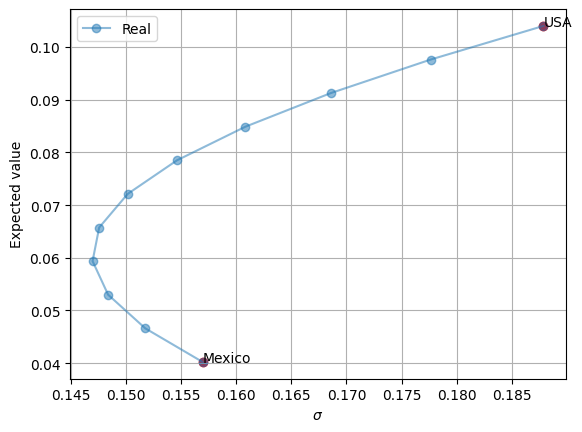

In [32]:
# ¿Cuál es el portafoio con varianza mínima?
# Inversión en el 100% de los activos
plt.plot(df.volatility, df.expected_value, marker="o", alpha=0.5, label='Real')
plt.scatter(df_one_portafolio.volatility, df_one_portafolio.expected_value, c="red", label="")
plt.text(df_one_portafolio.volatility[0], df_one_portafolio.expected_value[0], 'Mexico')
plt.text(df_one_portafolio.volatility[1], df_one_portafolio.expected_value[1], 'USA')
plt.legend(loc='best')
plt.grid()
plt.xlabel("$\sigma$")
plt.ylabel("Expected value")

In [33]:
# ¿Cual es el porfafgolio de minima varianza?
df_min_var = df[df.volatility == df.volatility.min()]

Text(0, 0.5, 'Expected value')

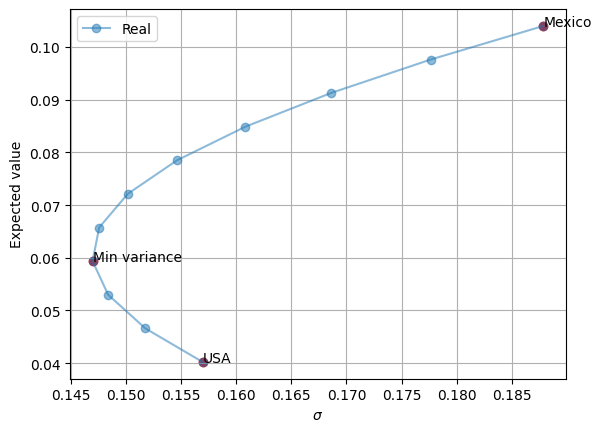

In [34]:
# ¿Cuál es el portafoio con varianza mínima?
# Inversión en el 100% de los activos
plt.plot(df.volatility, df.expected_value, marker="o", alpha=0.5, label='Real')
plt.scatter(df_one_portafolio.volatility, df_one_portafolio.expected_value, c="red", label="")
plt.text(df_one_portafolio.volatility[0], df_one_portafolio.expected_value[0], 'USA')
plt.text(df_one_portafolio.volatility[1], df_one_portafolio.expected_value[1], 'Mexico')
plt.scatter(df_min_var.volatility, df_min_var.expected_value, c="red")
plt.text(df_min_var.volatility, df_min_var.expected_value, "Min variance")

plt.legend(loc='best')
plt.grid()
plt.xlabel("$\sigma$")
plt.ylabel("Expected value")

# Obtener el portafolio de minima varianza de forma analitica  
$$w_a = \frac{\sigma_b^2 - cov(a,b)}{\sigma_a^2 + \sigma_b^2 - 2 cov(a,b)}$$


In [11]:
sigma_eua = rt['VOO'].std()
sigma_mx = rt['NAFTRAC.MX'].std()
cov_mx_usa = rt.cov().values[0][1]

w_usa_min_variance  = (sigma_mx ** 2 - cov_mx_usa) / (sigma_eua**2 + sigma_mx **2 - 2*cov_mx_usa)
w_mx_min_variance = 1 - w_usa_min_variance
(w_usa_min_variance, w_mx_min_variance)

(0.3202654317492875, 0.6797345682507125)

# Combinando distintos tipos de correlación

Ilustrar gráficamente como se vería el portafolio correlacion de 0, -1, 1 y la real


In [12]:
# Crear columna con correlación 0
df['volatility_correlation_0'] =  df.apply(lambda x: volatility_correlation(x, s_usa, s_mx, 0), axis=1) * 252**0.5
# Crear columna con correlación 1
df['volatility_correlation_1'] =  df.apply(lambda x: volatility_correlation(x, s_usa, s_mx, 1), axis=1) * 252**0.5
# Crear columna con correlación -1
df['volatility_correlation_minus_1'] =  df.apply(lambda x: volatility_correlation(x, s_usa, s_mx, -1), axis=1) * 252**0.5


Text(0, 0.5, 'Expected value')

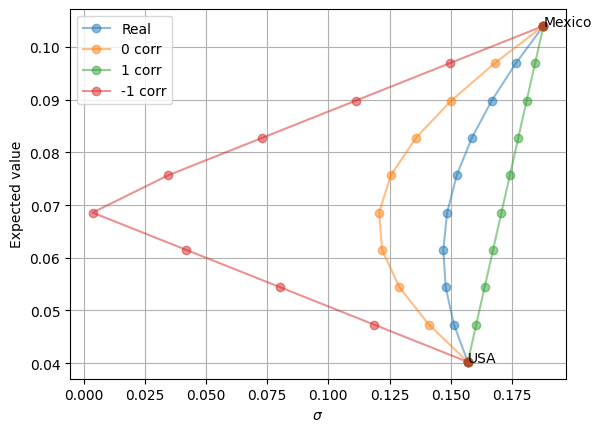

In [13]:
# Poner todo en un mismo gráfico 
plt.plot(df.volatility, df.expected_value, marker="o", alpha=0.5, label='Real')
plt.plot(df.volatility_correlation_0, df.expected_value, marker="o", alpha=0.5, label='0 corr')
plt.plot(df.volatility_correlation_1, df.expected_value, marker="o", alpha=0.5, label='1 corr')
plt.plot(df.volatility_correlation_minus_1, df.expected_value, marker="o", alpha=0.5, label = '-1 corr')
plt.scatter(df_one_portafolio.volatility, df_one_portafolio.expected_value, c="red", label="")
plt.text(df_one_portafolio.volatility[0], df_one_portafolio.expected_value[0], 'USA')
plt.text(df_one_portafolio.volatility[1], df_one_portafolio.expected_value[1], 'Mexico')
plt.legend(loc='best')
plt.grid()
plt.xlabel("$\sigma$")
plt.ylabel("Expected value")